<a href="https://colab.research.google.com/github/periclesrialto/periclesrialto/blob/main/Cross_Validation_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns

from glob import glob

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# **Análise exploratória**

**ADL**

In [191]:
#Importando apenas um ADL para análise prévia
df = pd.read_csv('adl-01-acc.csv')
df.columns = ['time [ms]', 'SVtotal [g]', 'Ax [g]', 'Az [g]', 'Ay [g]']
#Cálculo da taxa de variação das acelerações
df = df.assign(SVtotaldt= df['SVtotal [g]'].diff())
df = df.assign(Axdt= df['Ax [g]'].diff())
df = df.assign(Azdt= df['Az [g]'].diff())
df = df.assign(Aydt= df['Ay [g]'].diff())
df.fillna(0)

,time [ms],SVtotal [g],Ax [g],Az [g],Ay [g],SVtotaldt,Axdt,Azdt,Aydt
0,31,1.232825,-0.066079,1.221349,-0.154265,0.000000,0.000000,0.000000,0.000000
1,46,1.271040,-0.081063,1.259424,-0.151072,0.038215,-0.014984,0.038075,0.003193
2,62,1.334946,-0.103908,1.315677,-0.200692,0.063906,-0.022845,0.056253,-0.049620
3,93,1.343159,-0.072465,1.311010,-0.282984,0.008214,0.031443,-0.004667,-0.082291
4,124,1.277563,-0.037338,1.229701,-0.344395,-0.065597,0.035127,-0.081309,-0.061411
...,...,...,...,...,...,...,...,...,...
243,5116,1.159218,0.250067,0.616324,-0.949420,-0.059364,0.026284,-0.121349,-0.005650
244,5132,1.147681,0.257436,0.596673,-0.945981,-0.011537,0.007369,-0.019652,0.003439
245,5148,1.083414,0.225994,0.581443,-0.885797,-0.064267,-0.031443,-0.015230,0.060183
246,5179,1.078559,0.221572,0.623939,-0.851407,-0.004855,-0.004422,0.042497,0.034390


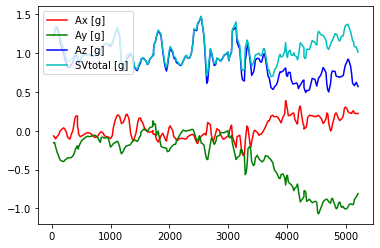

In [192]:
plt.plot(df['time [ms]'], df['Ax [g]'], 'r', label="Ax [g]")
plt.plot(df['time [ms]'], df['Ay [g]'], 'g', label="Ay [g]")
plt.plot(df['time [ms]'], df['Az [g]'], 'b', label="Az [g]")
plt.plot(df['time [ms]'], df['SVtotal [g]'], 'c', label="SVtotal [g]")
plt.legend(loc="upper left")
plt.show()

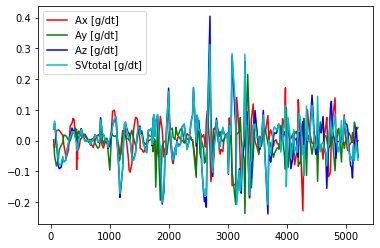

In [193]:
plt.plot(df['time [ms]'], df['Axdt'], 'r', label="Ax [g/dt]")
plt.plot(df['time [ms]'], df['Aydt'], 'g', label="Ay [g/dt]")
plt.plot(df['time [ms]'], df['Azdt'], 'b', label="Az [g/dt]")
plt.plot(df['time [ms]'], df['SVtotaldt'], 'c', label="SVtotal [g/dt]")
plt.legend(loc="upper left")
plt.show()

**Fall**

In [194]:
#Importando apenas um ADL para análise prévia
df = pd.read_csv('fall-05-acc.csv')
df.columns = ['time [ms]', 'SVtotal [g]', 'Ax [g]', 'Az [g]', 'Ay [g]']
#Cálculo da taxa de variação das acelerações
df = df.assign(SVtotaldt= df['SVtotal [g]'].diff())
df = df.assign(Axdt= df['Ax [g]'].diff())
df = df.assign(Azdt= df['Az [g]'].diff())
df = df.assign(Aydt= df['Ay [g]'].diff())
df.fillna(0)

,time [ms],SVtotal [g],Ax [g],Az [g],Ay [g],SVtotaldt,Axdt,Azdt,Aydt
0,9,1.090450,-0.096784,1.025570,0.357660,0.000000,0.000000,0.000000,0.000000
1,12,1.303265,-0.120121,1.214717,0.456655,0.212815,-0.023336,0.189147,0.098995
2,43,1.135000,-0.016704,1.063645,0.395735,-0.168265,0.103417,-0.151072,-0.060920
3,74,1.113183,0.004176,1.026307,0.431108,-0.021817,0.020880,-0.037338,0.035373
4,83,1.200296,0.092854,1.056767,0.561545,0.087113,0.088678,0.030460,0.130438
...,...,...,...,...,...,...,...,...,...
184,4879,1.122198,0.618044,-0.085976,0.932716,-0.004531,-0.052322,0.399174,0.168021
185,4914,1.102278,0.655136,-0.094819,0.881376,-0.019920,0.037092,-0.008843,-0.051340
186,4941,1.065364,0.671840,-0.200938,0.802032,-0.036914,0.016704,-0.106119,-0.079343
187,5017,1.103679,0.790978,-0.234100,0.733252,0.038315,0.119138,-0.033162,-0.068781


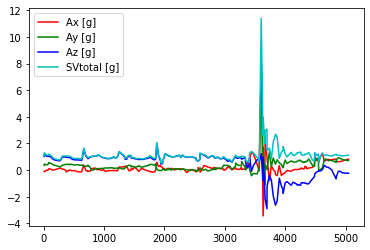

In [195]:
plt.plot(df['time [ms]'], df['Ax [g]'], 'r', label="Ax [g]")
plt.plot(df['time [ms]'], df['Ay [g]'], 'g', label="Ay [g]")
plt.plot(df['time [ms]'], df['Az [g]'], 'b', label="Az [g]")
plt.plot(df['time [ms]'], df['SVtotal [g]'], 'c', label="SVtotal [g]")
plt.legend(loc="upper left")
plt.show()

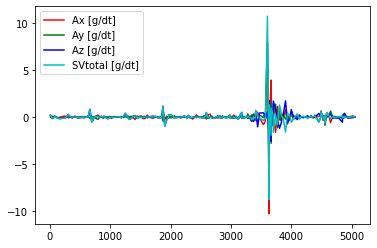

In [196]:
plt.plot(df['time [ms]'], df['Axdt'], 'r', label="Ax [g/dt]")
plt.plot(df['time [ms]'], df['Aydt'], 'g', label="Ay [g/dt]")
plt.plot(df['time [ms]'], df['Azdt'], 'b', label="Az [g/dt]")
plt.plot(df['time [ms]'], df['SVtotaldt'], 'c', label="SVtotal [g/dt]")
plt.legend(loc="upper left")
plt.show()

# **Construindo o dataframe com as features**

**ADL**

In [197]:
df_features_adl = pd.DataFrame(columns = ['Fall',
                                      'SVtotal - max', 'SVtotal - min', 
                                      'SVtotal - mean', 'SVtotal - std',
                                      'SVtotal - median', 
                                      'SVtotal dt - max', 'SVtotal dt - min', 
                                      'SVtotal dt - mean', 'SVtotal dt - std',
                                      'SVtotal dt - median', 
                                      'Ax - max', 'Ax - min', 
                                      'Ax - mean', 'Ax - std',
                                      'Ax - median', 
                                      'Ax dt - max', 'Ax dt - min', 
                                      'Ax dt - mean', 'Ax dt - std',
                                      'Ax dt - median', 
                                      'Ay - max', 'Ay - min', 
                                      'Ay - mean', 'Ay - std',
                                      'Ay - median', 
                                      'Ay dt - max', 'Ay dt - min', 
                                      'Ay dt - mean', 'Ay dt - std',
                                      'Ay dt - median', 
                                      'Az - max', 'Az - min', 
                                      'Az - mean', 'Az - std',
                                      'Az - median',
                                      'Az dt - max', 'Az dt - min', 
                                      'Az dt - mean', 'Az dt - std',
                                      'Az dt - median'])

train_adl_files = sorted(glob('adl-*-acc.csv'))

for file in range(len(train_adl_files)):
  #importa uma tabela do array de tabelas
  df_pivot = pd.read_csv(train_adl_files[file])
  #Cria as colunas para as tabelas
  df_pivot.columns = ['time [ms]', 'SVtotal [g]', 'Ax [g]', 'Az [g]', 'Ay [g]']
  df_pivot = df_pivot.assign(SVtotaldt= df_pivot['SVtotal [g]'].diff())
  df_pivot = df_pivot.assign(Axdt= df_pivot['Ax [g]'].diff())
  df_pivot = df_pivot.assign(Azdt= df_pivot['Az [g]'].diff())
  df_pivot = df_pivot.assign(Aydt= df_pivot['Ay [g]'].diff())
  df_pivot.fillna(0)
  #Extrai os dados para o dataframe de features
  new_row = ([0, df_pivot['SVtotal [g]'].max(), df_pivot['SVtotal [g]'].min(),
  df_pivot['SVtotal [g]'].mean(), df_pivot['SVtotal [g]'].std(),
  df_pivot['SVtotal [g]'].median(), 
  df_pivot['SVtotaldt'].max(), df_pivot['SVtotaldt'].min(),
  df_pivot['SVtotaldt'].mean(), df_pivot['SVtotaldt'].std(),
  df_pivot['SVtotaldt'].median(), 
  df_pivot['Ax [g]'].max(), df_pivot['Ax [g]'].min(), 
  df_pivot['Ax [g]'].mean(), df_pivot['Ax [g]'].std(),
  df_pivot['Ax [g]'].median(), 
  df_pivot['Axdt'].max(), df_pivot['Axdt'].min(), 
  df_pivot['Axdt'].mean(), df_pivot['Axdt'].std(),
  df_pivot['Axdt'].median(), 
  df_pivot['Ay [g]'].max(), df_pivot['Ay [g]'].min(), 
  df_pivot['Ay [g]'].mean(), df_pivot['Ay [g]'].std(),
  df_pivot['Ay [g]'].median(), 
  df_pivot['Aydt'].max(), df_pivot['Aydt'].min(), 
  df_pivot['Aydt'].mean(), df_pivot['Aydt'].std(),
  df_pivot['Aydt'].median(), 
  df_pivot['Az [g]'].max(), df_pivot['Az [g]'].min(), 
  df_pivot['Az [g]'].mean(), df_pivot['Az [g]'].std(),
  df_pivot['Az [g]'].median(), 
  df_pivot['Azdt'].max(), df_pivot['Azdt'].min(), 
  df_pivot['Azdt'].mean(), df_pivot['Azdt'].std(), 
  df_pivot['Azdt'].median()]);

  df_features_adl.loc[file] = new_row
  

**FALL**

In [198]:
df_features_fall = pd.DataFrame(columns = ['Fall',
                                      'SVtotal - max', 'SVtotal - min', 
                                      'SVtotal - mean', 'SVtotal - std',
                                      'SVtotal - median', 
                                      'SVtotal dt - max', 'SVtotal dt - min', 
                                      'SVtotal dt - mean', 'SVtotal dt - std',
                                      'SVtotal dt - median', 
                                      'Ax - max', 'Ax - min', 
                                      'Ax - mean', 'Ax - std',
                                      'Ax - median', 
                                      'Ax dt - max', 'Ax dt - min', 
                                      'Ax dt - mean', 'Ax dt - std',
                                      'Ax dt - median', 
                                      'Ay - max', 'Ay - min', 
                                      'Ay - mean', 'Ay - std',
                                      'Ay - median', 
                                      'Ay dt - max', 'Ay dt - min', 
                                      'Ay dt - mean', 'Ay dt - std',
                                      'Ay dt - median', 
                                      'Az - max', 'Az - min', 
                                      'Az - mean', 'Az - std',
                                      'Az - median',
                                      'Az dt - max', 'Az dt - min', 
                                      'Az dt - mean', 'Az dt - std',
                                      'Az dt - median'])

train_fall_files = sorted(glob('fall-*-acc.csv'))

for file in range(len(train_fall_files)):
  #importa uma tabela do array de tabelas
  df_pivot = pd.read_csv(train_fall_files[file])
  #Cria as colunas para as tabelas
  df_pivot.columns = ['time [ms]', 'SVtotal [g]', 'Ax [g]', 'Az [g]', 'Ay [g]']
  df_pivot = df_pivot.assign(SVtotaldt= df_pivot['SVtotal [g]'].diff())
  df_pivot = df_pivot.assign(Axdt= df_pivot['Ax [g]'].diff())
  df_pivot = df_pivot.assign(Azdt= df_pivot['Az [g]'].diff())
  df_pivot = df_pivot.assign(Aydt= df_pivot['Ay [g]'].diff())
  df_pivot.fillna(0)
  #Extrai os dados para o dataframe de features
  new_row = ([1, df_pivot['SVtotal [g]'].max(), df_pivot['SVtotal [g]'].min(),
  df_pivot['SVtotal [g]'].mean(), df_pivot['SVtotal [g]'].std(),
  df_pivot['SVtotal [g]'].median(), 
  df_pivot['SVtotaldt'].max(), df_pivot['SVtotaldt'].min(),
  df_pivot['SVtotaldt'].mean(), df_pivot['SVtotaldt'].std(),
  df_pivot['SVtotaldt'].median(), 
  df_pivot['Ax [g]'].max(), df_pivot['Ax [g]'].min(), 
  df_pivot['Ax [g]'].mean(), df_pivot['Ax [g]'].std(),
  df_pivot['Ax [g]'].median(), 
  df_pivot['Axdt'].max(), df_pivot['Axdt'].min(), 
  df_pivot['Axdt'].mean(), df_pivot['Axdt'].std(),
  df_pivot['Axdt'].median(), 
  df_pivot['Ay [g]'].max(), df_pivot['Ay [g]'].min(), 
  df_pivot['Ay [g]'].mean(), df_pivot['Ay [g]'].std(),
  df_pivot['Ay [g]'].median(), 
  df_pivot['Aydt'].max(), df_pivot['Aydt'].min(), 
  df_pivot['Aydt'].mean(), df_pivot['Aydt'].std(),
  df_pivot['Aydt'].median(), 
  df_pivot['Az [g]'].max(), df_pivot['Az [g]'].min(), 
  df_pivot['Az [g]'].mean(), df_pivot['Az [g]'].std(),
  df_pivot['Az [g]'].median(), 
  df_pivot['Azdt'].max(), df_pivot['Azdt'].min(), 
  df_pivot['Azdt'].mean(), df_pivot['Azdt'].std(), 
  df_pivot['Azdt'].median()]);

  df_features_fall.loc[file] = new_row

**Dataframe de features completo para treinamento**

In [199]:
df_features = pd.concat([df_features_adl, df_features_fall])
#O Shuffle realizado no dataframe de features pode mudar o resultado da validação cruzada
df_features = df_features.sample(frac=1)

**Dataframe de teste**

In [200]:
df_teste = pd.DataFrame(columns = ['Fall',
                                      'SVtotal - max', 'SVtotal - min', 
                                      'SVtotal - mean', 'SVtotal - std',
                                      'SVtotal - median', 
                                      'SVtotal dt - max', 'SVtotal dt - min', 
                                      'SVtotal dt - mean', 'SVtotal dt - std',
                                      'SVtotal dt - median', 
                                      'Ax - max', 'Ax - min', 
                                      'Ax - mean', 'Ax - std',
                                      'Ax - median', 
                                      'Ax dt - max', 'Ax dt - min', 
                                      'Ax dt - mean', 'Ax dt - std',
                                      'Ax dt - median', 
                                      'Ay - max', 'Ay - min', 
                                      'Ay - mean', 'Ay - std',
                                      'Ay - median', 
                                      'Ay dt - max', 'Ay dt - min', 
                                      'Ay dt - mean', 'Ay dt - std',
                                      'Ay dt - median', 
                                      'Az - max', 'Az - min', 
                                      'Az - mean', 'Az - std',
                                      'Az - median',
                                      'Az dt - max', 'Az dt - min', 
                                      'Az dt - mean', 'Az dt - std',
                                      'Az dt - median'])

teste_files = sorted(glob('test_*.csv'))

for file in range(len(teste_files)):
  #importa uma tabela do array de tabelas
  df_pivot = pd.read_csv(teste_files[file])
  #Cria as colunas para as tabelas
  df_pivot.columns = ['time [ms]', 'SVtotal [g]', 'Ax [g]', 'Az [g]', 'Ay [g]']
  df_pivot = df_pivot.assign(SVtotaldt= df_pivot['SVtotal [g]'].diff())
  df_pivot = df_pivot.assign(Axdt= df_pivot['Ax [g]'].diff())
  df_pivot = df_pivot.assign(Azdt= df_pivot['Az [g]'].diff())
  df_pivot = df_pivot.assign(Aydt= df_pivot['Ay [g]'].diff())
  df_pivot.fillna(0)
  #Extrai os dados para o dataframe de features
  if file>5: 
    fall = 1
  else:
    fall = 0
  new_row = ([fall, df_pivot['SVtotal [g]'].max(), df_pivot['SVtotal [g]'].min(),
  df_pivot['SVtotal [g]'].mean(), df_pivot['SVtotal [g]'].std(),
  df_pivot['SVtotal [g]'].median(), 
  df_pivot['SVtotaldt'].max(), df_pivot['SVtotaldt'].min(),
  df_pivot['SVtotaldt'].mean(), df_pivot['SVtotaldt'].std(),
  df_pivot['SVtotaldt'].median(), 
  df_pivot['Ax [g]'].max(), df_pivot['Ax [g]'].min(), 
  df_pivot['Ax [g]'].mean(), df_pivot['Ax [g]'].std(),
  df_pivot['Ax [g]'].median(), 
  df_pivot['Axdt'].max(), df_pivot['Axdt'].min(), 
  df_pivot['Axdt'].mean(), df_pivot['Axdt'].std(),
  df_pivot['Axdt'].median(), 
  df_pivot['Ay [g]'].max(), df_pivot['Ay [g]'].min(), 
  df_pivot['Ay [g]'].mean(), df_pivot['Ay [g]'].std(),
  df_pivot['Ay [g]'].median(), 
  df_pivot['Aydt'].max(), df_pivot['Aydt'].min(), 
  df_pivot['Aydt'].mean(), df_pivot['Aydt'].std(),
  df_pivot['Aydt'].median(), 
  df_pivot['Az [g]'].max(), df_pivot['Az [g]'].min(), 
  df_pivot['Az [g]'].mean(), df_pivot['Az [g]'].std(),
  df_pivot['Az [g]'].median(), 
  df_pivot['Azdt'].max(), df_pivot['Azdt'].min(), 
  df_pivot['Azdt'].mean(), df_pivot['Azdt'].std(), 
  df_pivot['Azdt'].median()]);

  df_teste.loc[file] = new_row

In [201]:
#Importando apenas um ADL para análise prévia
df = pd.read_csv('test_10.csv')
df.columns = ['time [ms]', 'SVtotal [g]', 'Ax [g]', 'Az [g]', 'Ay [g]']
#Cálculo da taxa de variação das acelerações
df = df.assign(SVtotaldt= df['SVtotal [g]'].diff())
df = df.assign(Axdt= df['Ax [g]'].diff())
df = df.assign(Azdt= df['Az [g]'].diff())
df = df.assign(Aydt= df['Ay [g]'].diff())
df.fillna(0)

,time [ms],SVtotal [g],Ax [g],Az [g],Ay [g],SVtotaldt,Axdt,Azdt,Aydt
0,21.0,0.977008,-0.923348,0.550218,-0.114537,0.000000,0.000000,0.000000,0.000000
1,38.0,1.438821,-0.608400,0.838917,0.126488,0.461813,0.314948,0.288699,0.241025
2,54.0,1.984782,-0.269010,1.197440,0.379095,0.545961,0.339390,0.358523,0.252607
3,76.0,0.917805,-0.959406,0.518595,-0.073812,-1.066977,-0.690396,-0.678845,-0.452907
4,87.0,0.921742,-0.955715,0.530638,-0.064965,0.003937,0.003691,0.012043,0.008848
...,...,...,...,...,...,...,...,...,...
143,2035.0,1.314802,1.009205,0.353573,0.737046,0.027195,-0.006113,0.015826,0.041461
144,2050.0,1.619501,1.188332,0.584293,0.870003,0.304700,0.179126,0.230720,0.132957
145,2068.0,0.374498,0.405307,-0.189892,0.314833,-1.245003,-0.783025,-0.774185,-0.555170
146,2087.0,0.319018,0.378240,-0.250750,0.290328,-0.055480,-0.027067,-0.060859,-0.024505


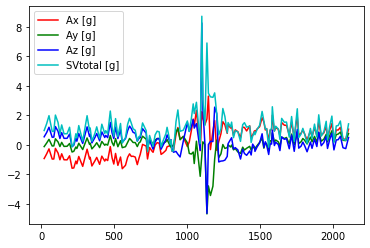

In [202]:
plt.plot(df['time [ms]'], df['Ax [g]'], 'r', label="Ax [g]")
plt.plot(df['time [ms]'], df['Ay [g]'], 'g', label="Ay [g]")
plt.plot(df['time [ms]'], df['Az [g]'], 'b', label="Az [g]")
plt.plot(df['time [ms]'], df['SVtotal [g]'], 'c', label="SVtotal [g]")
plt.legend(loc="upper left")
plt.show()

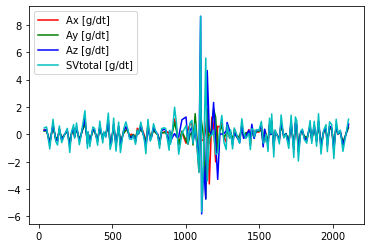

In [203]:
plt.plot(df['time [ms]'], df['Axdt'], 'r', label="Ax [g/dt]")
plt.plot(df['time [ms]'], df['Aydt'], 'g', label="Ay [g/dt]")
plt.plot(df['time [ms]'], df['Azdt'], 'b', label="Az [g/dt]")
plt.plot(df['time [ms]'], df['SVtotaldt'], 'c', label="SVtotal [g/dt]")
plt.legend(loc="upper left")
plt.show()

# **Tuning de hiperparâmetros SVM**

In [204]:
X = df_features.iloc[:, 1:].values
y = df_features.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,
                                                    random_state=1, stratify=y)

In [205]:
pipe_svc = Pipeline([('scaler', StandardScaler()),
                               ('svc', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


1.0
{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


1.0
{'svc__C': 0.1, 'svc__kernel': 'linear'}


# **Análise de curva**

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


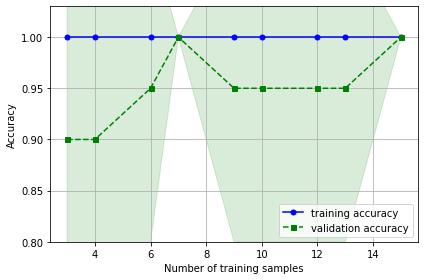

In [207]:
pipe_lr = Pipeline([('scaler', StandardScaler()),
                          ("classifier",LogisticRegression(penalty='l2',
                                                           random_state=1))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# **Treino de classificadores com validação cruzada**

In [208]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
svm = SVC(kernel='linear', random_state=1, gamma=1.0, C=0.1)
rfc = RandomForestClassifier(max_depth=5, random_state=1)
lr = LogisticRegression(penalty='l2', random_state=1)


classifiers = [svm, tree, rfc, lr]

Text(0.5, 1.0, 'K-FOLD')

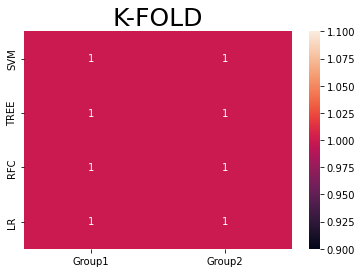

In [209]:
#Grupo dividido em 4 devido a baixa quantidade de dados disponíveis

scores = np.zeros((4,2))
for classifier in range(len(classifiers)):
  pipe_train = Pipeline([('scaler', StandardScaler()),
                               ('pca', PCA(n_components=3)),
                               ("classifier",classifiers[classifier])])
  pipe_train.fit(X_train, y_train)

  kfold = StratifiedKFold(n_splits=2).split(X_train, y_train)
  for k, (train, test) in enumerate(kfold):
      pipe_train.fit(X_train[train], y_train[train])
      score = pipe_train.score(X_train[test], y_train[test])
      scores[classifier][k] = score

scores = pd.DataFrame(scores)
scores.columns = ['Group1', 'Group2']
scores.index  = ['SVM', 'TREE', 'RFC', 'LR']
sns.heatmap(scores, annot=True).set_title('K-FOLD', fontdict={'fontsize':25})

# **Classificação dos csv de teste**

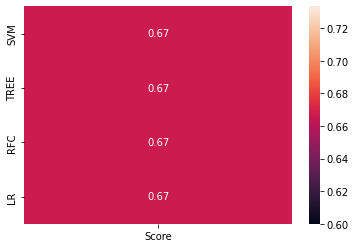

In [210]:
scores = np.zeros((4,1))

X_test = df_teste.iloc[:, 1:].values
y_test = df_teste.iloc[:, 0].values

for c in range(len(classifiers)):

  test_score = pipe_train.score(X_test, y_test)
  scores[c] = test_score
  
scores = pd.DataFrame(scores)
scores.columns = ['Score']
scores.index  = ['SVM', 'TREE',
                        'RFC', 'LR']
sns.heatmap(scores, annot=True)

# **Confusion Matrix**

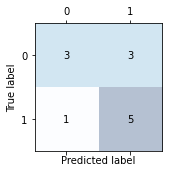

In [212]:
y_pred = pipe_train.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()